In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itchat
import jieba
import re
import json
from PIL import Image
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 


In [4]:
wbfriends=itchat.get_friends(update=True)[0:]

In [7]:
#将微信朋友信息存储到本地json文件
json.dump(wbfriends, open('webchat-jsonfile.js', 'w'))

In [12]:
#将微信朋友信息处理为pandas数据进行分析，导出到excel文件
df=json.loads(json.dumps(wbfriends))
df=pd.DataFrame(df)
df.to_excel('webchat-data2.xls',index=True)

In [13]:
#包含的信息比较多，可根据自己的想法进行分析；朋友nickname、sex和Signature等等。
df.dtypes

Alias                 object
AppAccountFlag         int64
AttrStatus             int64
ChatRoomId             int64
City                  object
ContactFlag            int64
DisplayName           object
EncryChatRoomId       object
HeadImgFlag          float64
HeadImgUrl            object
HideInputBarFlag       int64
IsOwner                int64
KeyWord               object
MemberCount            int64
MemberList            object
NickName              object
OwnerUin               int64
PYInitial             object
PYQuanPin             object
Province              object
RemarkName            object
RemarkPYInitial       object
RemarkPYQuanPin       object
Sex                    int64
Signature             object
SnsFlag                int64
StarFriend             int64
Statues                int64
Uin                    int64
UniFriend              int64
UserName              object
VerifyFlag             int64
WebWxPluginSwitch    float64
dtype: object

In [43]:
siglist=[]
for i in wbfriends:
    signature=i["Signature"].strip().replace("span","").replace("class","").replace("emoji","")
    rep=re.compile("1f\d+\W*|[<>/=]|[/\"(\d\s.*)\"/]")
    signature=rep.sub("",signature)
    siglist.append(signature)
text="".join(siglist)

In [44]:
print text

善至理，致良知。格物致知。知本利，而善行。知行合一。签名个性微尘面朝大海，春暖花开举重若轻是凭实力还是定力？珠是贝一生的眼泪嗯哼Iain'tafraidtodieanymoreI'ddoneitalready神经病人思维广，弱智儿童欢乐多！天上飞滴啥？飞滴麦兜哇！！出售武商卡人生若相守如初游客️岁月静好新手，多关照我是谁,我是我,谁也不是。不能把世界让给你鄙视的人aacfWish欢迎检查，谢谢关心贵新时间让我看清自己新年好，一个好的开始，，加油^ω^！TimeyouenjoywastingwasnotwastedGMIC主办方——长城会（GWC）最具影响力的全球创新者平台。继续帝都！无无明用心甘情愿的态度，去过随遇而安的生活。草观秀木，不见根深蒂固，恨其夺日月之光～我们家的咪咪其实是条狗！！！^o^前方无绝路，希望在转角一根葱xgpao简简单单，平平淡淡一片一片的拼凑抵抗静观其变是一种能力顺其自然是一种幸福！男人对自己要狠一点！各自安好、、Themagicdoesnothappenbyitself没有好身体，怎么干革命！咿呀咿呀哟！！我妈说低调儿是美德！d就像，没有伞你就得加快脚步一样，没有爱，你就得积极寻找！奋斗再见择一城，开家店，虚度时光……顺其自然手如柔荑，肤如凝脂，领如蝤蛴，齿如瓠犀，螓首蛾眉，巧笑倩兮爱莲者，中通外直，不蔓不枝此号已满，请大家加八妹新号jinrongbaguanv得之我幸，失之我命淡定无穷般若心自在，语默动静体自然虚心竹有低头叶，傲骨梅无仰面花。爱你自己，是你一生浪漫的开始。人之所以活得累，是因为放不下架子、撕不开面子、解不开情结勿以恶小而为之勿以善小而不为老子不好惹此处略过字咸吃萝卜。本號純屬虛構隐忍激昂期待未来，做好当下。茶能醉人何必酒，书能香我不须花面朝大海，春暖花开!cunshenchen，q我就是懒，什么都不想留。Prosperous!top顶吉整形ff不忘初心方得始终梦里花落知多少makeitcount对父母多一点耐心，就像小时候他们对我们那样。匠心独具牛人荟萃的科技社区，精工智造坊间巧匠的造梦团队善心点亮心灯；慧心使心灯长明！PTSD详细的功能可以见github仓库wiki页。


In [45]:
wbcut=jieba.cut(text,cut_all=True)
wbcutall="".join(wbcut)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/34/tzfzfkg9235g12yzznw3jkjc0000gn/T/jieba.cache
Loading model cost 0.701 seconds.
Prefix dict has been built succesfully.


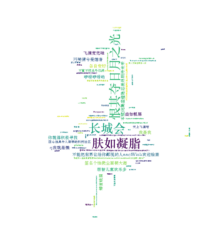

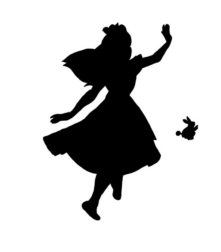

LOG OUT!


In [51]:
webchat_coloring = np.array(Image.open('255fk.jpg'))
#colo=np.array(Image.open('wali.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("said")

wbcut = WordCloud(background_color="white", max_words=2000, mask=webchat_coloring,
               stopwords=stopwords,font_path="STZHONGS.ttf",max_font_size=38)
# generate word cloud
wbcut.generate(text)
# store to file
wbcut.to_file("webchat_coloring3.png")

# show
plt.imshow(wbcut, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(webchat_coloring, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
